<h1 align="center">Mobile Money Financial Inclusion Analyzer</h1>


### 1. Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the Mobile Money Financial Inclusion Dataset

In [25]:
df = pd.read_csv('C:/Users/USER/Group-10-Mobile-Money-Financial-Inclusion-Analyzer/data/GLOBAL MOBILE MONEY DATASET.csv')
display(df.head())

,Measure,Geo_view,Geo_name,Attribute,Unit,Metric,01/03/2001,01/06/2001,01/09/2001,01/12/2001,...,01/12/2022,01/03/2023,01/06/2023,01/09/2023,01/12/2023,01/03/2024,01/06/2024,01/09/2024,01/12/2024,Unnamed: 102
0,Active Services,Region,East Asia and Pacific,Active Services,Services,Mobile Money Services,NaN,NaN,NaN,1,...,51,NaN,NaN,NaN,52,NaN,NaN,NaN,64,NaN
1,Active Services,Region,Europe and Central Asia,Active Services,Services,Mobile Money Services,NaN,NaN,NaN,0,...,7,NaN,NaN,NaN,7,NaN,NaN,NaN,7,NaN
2,Active Services,Region,Latin America and the Caribbean,Active Services,Services,Mobile Money Services,NaN,NaN,NaN,0,...,30,NaN,NaN,NaN,29,NaN,NaN,NaN,31,NaN
3,Active Services,Region,Middle East and North Africa,Active Services,Services,Mobile Money Services,NaN,NaN,NaN,0,...,31,NaN,NaN,NaN,30,NaN,NaN,NaN,32,NaN
4,Active Services,Region,South Asia,Active Services,Services,Mobile Money Services,NaN,NaN,NaN,0,...,35,NaN,NaN,NaN,36,NaN,NaN,NaN,37,NaN


### 3. Visualizing Mobile Money Transactional Value Trends in Eastern Africa (2001–2024)

#### 3.1 Loading Transactional Value Data for Analysis

In [26]:
# Load the transactional value data
df_transactional_value = pd.read_csv('C:/Users/USER/Group-10-Mobile-Money-Financial-Inclusion-Analyzer/data/GLOBAL MOBILE MONEY DATASET.csv')


#### 3.2 Extracting Transactional Value Data for Eastern Africa

In [27]:
# Extract the row for Eastern Africa from df_transactional_value
eastern_africa_row = df_transactional_value[
    (df_transactional_value['Geo_name'] == 'Eastern Africa') &
    (df_transactional_value['Metric'] == 'Mobile Money transactional value')
]

#### 3.3 Cleaning and Converting Transactional Value Data for Time Series Analysis

In [28]:
# Select only the columns that are dates
date_columns = [col for col in eastern_africa_row.columns if '/' in col]

# Get the values and convert to numeric with improved cleaning
values_raw = eastern_africa_row[date_columns].iloc[0]
values_cleaned = (
    values_raw.astype(str)  # Convert to string first
    .str.strip()  # Remove leading/trailing whitespace
    .replace('', None)  # Replace empty strings with None
    .replace('-', None)  # Replace dash with None
    .replace('nan', None)  # Replace 'nan' strings with None
    .str.replace(',', '', regex=False)  # Remove commas from numbers
)

# Convert to numeric, handling any remaining non-numeric values
values = pd.to_numeric(values_cleaned, errors='coerce')

#### 3.4 Removing NaN Values and Corresponding Date Columns for Plotting

In [29]:
# Remove any NaN values and corresponding date columns for plotting
valid_mask = ~values.isna()
values_plot = values[valid_mask]
dates_plot = [date_columns[i] for i in range(len(date_columns)) if valid_mask.iloc[i]]

#### 3.5 Plotting Mobile Money Transactional Value Trends in Eastern Africa (2001–2024)

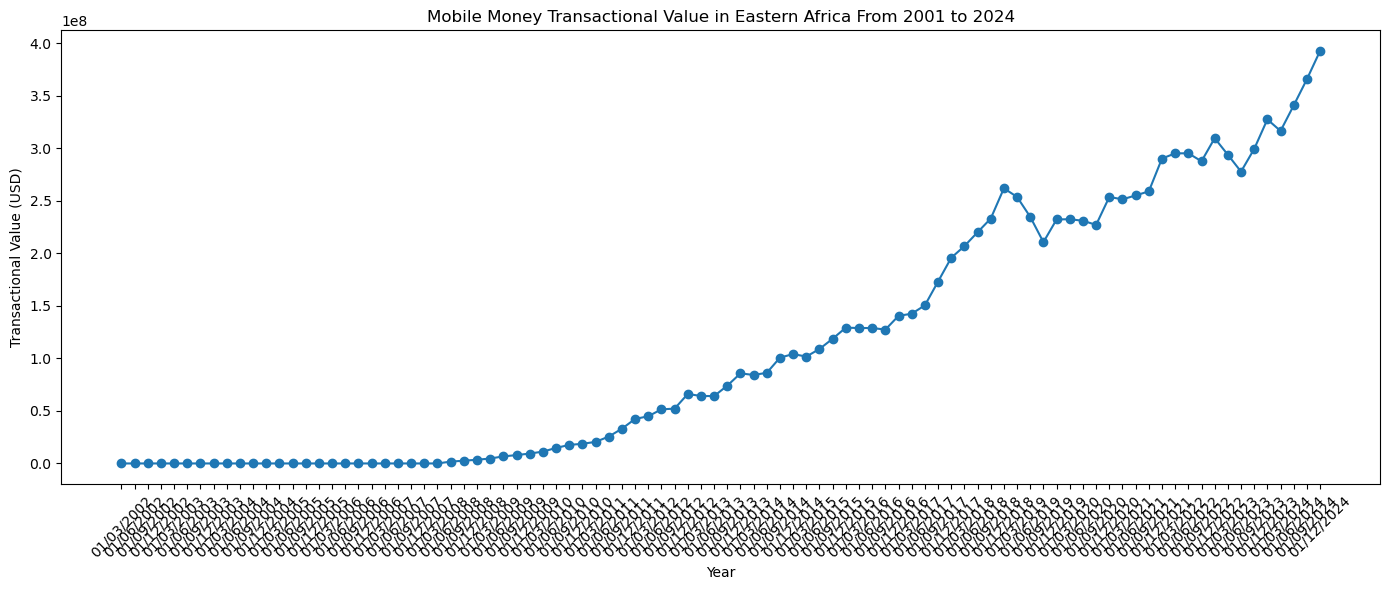

In [30]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(dates_plot, values_plot, marker='o')
plt.title('Mobile Money Transactional Value in Eastern Africa From 2001 to 2024')
plt.xlabel('Year')
plt.ylabel('Transactional Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3.6 Preparing Data and Building Time Series Prediction Models (Random Forest & XGBoost)

In [31]:

# Prepare the data for time series prediction
# Convert date columns to years (as integers)
years = np.array([int(date.split('/')[0]) for date in dates_plot]).reshape(-1, 1)
values_arr = values_plot.values

# Predict for the next 5 years
future_years = np.arange(years[-1][0] + 1, years[-1][0] + 6).reshape(-1, 1)

# Split data for training
X_train, X_test, y_train, y_test = train_test_split(years, values_arr, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(np.vstack([years, future_years]))
# Print predictions for the next 5 years
print("Random Forest Predictions for next 5 years:")
for year, pred in zip(future_years.flatten(), rf_pred[-1:]):
    print(f"{year}: {pred:.2f}")

# XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(np.vstack([years, future_years]))
# Print predictions for the next 5 years
print("\nXGBoost Predictions for next 5 years:")
for year, pred in zip(future_years.flatten(), xgb_pred[-1:]):
    print(f"{year}: {pred:.2f}")

Random Forest Predictions for next 5 years:
2: 118738846.48

XGBoost Predictions for next 5 years:
2: 119044552.00


#### 3.6 Evaluating Model Performance: Random Forest vs XGBoost on Test Set

In [32]:
# Predict on test set
rf_test_pred = rf.predict(X_test)
xgb_test_pred = xgb.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_test_pred)
xgb_mse = mean_squared_error(y_test, xgb_test_pred)

rf_r2 = r2_score(y_test, rf_test_pred)
xgb_r2 = r2_score(y_test, xgb_test_pred)

print(f"Random Forest - MSE: {rf_mse:.2f}, R2: {rf_r2:.4f}")
print(f"XGBoost      - MSE: {xgb_mse:.2f}, R2: {xgb_r2:.4f}")

if rf_mse < xgb_mse:
    print("Random Forest is more accurate on the test set.")
else:
    print("XGBoost is more accurate on the test set.")
    
    

Random Forest - MSE: 13615454010651622.00, R2: -0.0643
XGBoost      - MSE: 13633079200993462.00, R2: -0.0656
Random Forest is more accurate on the test set.
